<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación diagnóstica de mamografías </h2>
</center>

<h3> Práctico II -  Análisis y Curación <h3>
<h4>Integrantes: Mario Agustín Sgró, Lucía Benítez, Germán Bertea y Carolina Díaz <h4>

**Objetivo y alcance:** 
    Aprendizaje sobre limpieza y mejora de la base de datos. 
    Manejo y entendimiento de algunas técnicas de aumento de información, manejo de datos faltantes, imputación y reducción de dimensionalidad. 
Método: Se utilizarán componentes principales, algoritmo de k-medias, distancia entre observaciones, k-vecinos más cercanos, escalado de variables/features.

**Estructura del informe:**
Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

1- Analizar los tipos de datos y si hay algun inconveniente con la codificación de las variables.

2- Identificar los datos faltantes de la base de datos.

3- Realizar un listado con resumen explicativo de algunas técnicas de tratamiento de datos faltantes. 

4- Elegir tres abordajes (con alguna variante de metapámetros si las tuviera) incluída la imputación usando el vecino más cercano. 

5- Investigar opciones de aumentación de información, como por ejemplo polinómica de algunas variables, implementar algunas y evaluar su aporte en la clasificación.

6- Realizar un reescalado de las variables utilizando min-max y Z-score.

7- Realizar reducción de dimensionalidad usando componentes principales y otra que considere adecuada.

8- Combinar los abordajes.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import chardet
import string


plt.rcParams['figure.figsize'] = (200, 200)

In [2]:
if sns.__version__ != '0.9.0':
    print('Atención! utilizamos seaborn versión 0.9.0')

In [3]:
pd.options.display.max_columns = 200
#pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000

Lectura del data-set

In [4]:
dataframe = pd.read_csv('datos/Datos_Mamografias.csv',sep=',',index_col=['Imagen'])

# Análisis descriptivo de la base de datos

In [5]:
dataframe.head(3)

,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_15,Dcm_16,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
Imagen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5,700.0,621.0,1.073,-8.4,AUTOMATIC,AutoFilter,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.95269,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0,700.0,628.0,1.073,-44.9,AUTOMATIC,AutoFilter,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.0000

In [6]:
print("El data set consiste de ",dataframe.shape[0]," imagenes, con ",dataframe.shape[1]," registros cada una.")

El data set consiste de  6613  imagenes, con  197  registros cada una.


Nombres de las variables/features/características y tipo de variable para cada una:

In [7]:
for columna, tipo in zip(dataframe.columns.values,dataframe.dtypes):
    print("%15s %9s" % (columna,tipo))

            Age   float64
           View    object
     Laterality    object
          Dcm_1   float64
          Dcm_2   float64
          Dcm_3   float64
          Dcm_4   float64
          Dcm_5    object
          Dcm_6   float64
          Dcm_7   float64
          Dcm_8    object
          Dcm_9   float64
         Dcm_10   float64
         Dcm_11   float64
         Dcm_12   float64
         Dcm_13   float64
         Dcm_14   float64
         Dcm_15    object
         Dcm_16    object
         Dcm_17   float64
         Dcm_18    object
         Dcm_19    object
         Dcm_20   float64
         Dcm_21   float64
         Dcm_22   float64
         Dcm_23    object
           Area   float64
       Promedio   float64
          Media   float64
         Desvio   float64
      Asimetria   float64
       Kurtosis   float64
           Moda   float64
      Desvio_L1   float64
      Desvio_L2   float64
      Desvio_L3   float64
   Asimetria_L1   float64
   Asimetria_L2   float64
   Asimetria

Debido a que en las columnas 'Dcm_18' y 'Dcm_19' se observaron datos faltantes denotados como 'None',  se ha cambiado por 'np.nan' para que se puedan leer como números los datos de tales columnas:

In [8]:
dataframe['Dcm_18'].replace('None',np.nan,inplace=True)
dataframe['Dcm_19'].replace('None',np.nan,inplace=True)

dataframe.Dcm_18 = dataframe.Dcm_18.astype(float)
dataframe.Dcm_19 = dataframe.Dcm_19.astype(float)

## Filas con todos sus valores nulos

Buscamos aquellas filas que no tengan valores en ninguno de sus campos

In [9]:
null_rows = dataframe.isnull().all(axis=1)
print("Número de filas con todos sus campos vacios: ",null_rows.sum())

print(dataframe.index[null_rows].values)

Número de filas con todos sus campos vacios:  8
['Imagen_1186.npy,62,MLO,L,31,180,63,321,ALUMINUM,0.7,0.3,TUNGSTEN,53.0,143.9,700,622,1.0,44.4,AUTOMATIC,AutoFilter,324,None,None,0.5529999999999999,"[\'512\', \'460\', \'570\']","[\'800\', \'680\', \'980\']",NO,2871553,398.7648913323209,301.0,216.69988777988837,0.7467840533958822,-0.926642875509951,222.0,145.39007161823397,187.16749797941878,217.18235392429892,2.327222558139907,1.0710722556560872,0.440168009261964,4.0049405,0.0,0.0,0.0,0.0,0.0,nan,nan,nan,2.6082871748434058e-05,1237.983607008867,0.9868158177989955,46949.57897785341,0.041137780532449826,797.5315720998076,186560.33230440505,10.145818805319438,15.949980988907907,1.6029231908298377e-05,6.158659497133824,-0.2389789416251031,0.9933876239527222,2.5434464758582545e-05,1322.7193347526832,0.9859138434284372,46951.037638720765,0.04004258463315013,797.5717433796978,186481.43122013018,10.143998106725103,15.991636813740438,1.550265290212784e-05,6.204833510467141,-0.23432098128110537,0

Observamos que son filas (8 filas en total, aprox. 0.12%) para las cuales los datos están mal guardados en el archivo de entrada. Dado que representan un porcentaje muy pequeño del total de la muestra, las descartaremos por el momento.

In [10]:
dataframe.drop(axis=0,index=dataframe.index[null_rows].values,inplace=True)

### Tamaño del DataSet 

In [11]:
print("El data set consiste de ",dataframe.shape[0]," imagenes, con ",dataframe.shape[1]," registros cada una.")

El data set consiste de  6605  imagenes, con  197  registros cada una.


### Tipos de Variables

In [12]:
CatFeat = [x for x in dataframe.columns if dataframe[x].dtype != 'float64']
NumFeat = [x for x in dataframe.columns if dataframe[x].dtype == 'float64']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     189
   variables discretas  8


La base de datos contiene 8 variables categóricas y 189 variables numéricas, con 6613 filas de datos

 ### Variables categóricas

In [13]:
Features = [x for x in dataframe.columns if dataframe[x].dtype != 'float64']
print(Features)

['View', 'Laterality', 'Dcm_5', 'Dcm_8', 'Dcm_15', 'Dcm_16', 'Dcm_23', 'ACR']


In [14]:
for feature in Features:
    print(feature,dataframe[feature].unique())

View ['CC' 'MLO' 'MLOID']
Laterality ['R' 'L']
Dcm_5 ['RHODIUM' 'SILVER' 'MOLYBDENUM' 'ALUMINUM']
Dcm_8 ['TUNGSTEN' 'MOLYBDENUM']
Dcm_15 ['AUTOMATIC' 'AUTO_FILTER' 'MANUAL']
Dcm_16 ['AutoFilter' 'LORAD AUTO AEC' 'Manual' 'MANUAL']
Dcm_23 ['NO' 'YES']
ACR ['c' 'b' 'a' 'd']


Las variables 'View', 'Dcm_5', 'Dcm_15' y 'Dcm_16' poseen tres categorías. 'Laterality' y 'Dcm_23' poseen dos categorías mientras que 'ACR'y 'Dcm_16' tienen cuatro.


Siendo :

'Dcm_15'* (ExposureControlMode), modo de control de la exposición. 
    Existen tres posibles configuraciones: 
    * 'AUTOMATIC': Automático. 
    * 'AUTO_FILTER': Autofiltrado. 
    * 'MANUAL': Manual.
    
'Dcm_16'* (ExposureControlModeDescrip), descripción del modo de control de la exposición. 
    Existen tres posibles configuraciones: 
    * 'AutoFilter': Autofiltrado. 
    * 'MANUAL': Manual.
    * 'LORAD AUTO AEC' 
    * 'MANUAL' 
    * 'Manual'     


Notamos que "Manual" y "MANUAL" se corresponden al mismo atributo. 

In [15]:
dataframe["Dcm_16"].replace("Manual","MANUAL",inplace=True)


In [16]:
for feature in Features:
    print(feature,np.unique(dataframe[feature]))

View ['CC' 'MLO' 'MLOID']
Laterality ['L' 'R']
Dcm_5 ['ALUMINUM' 'MOLYBDENUM' 'RHODIUM' 'SILVER']
Dcm_8 ['MOLYBDENUM' 'TUNGSTEN']
Dcm_15 ['AUTOMATIC' 'AUTO_FILTER' 'MANUAL']
Dcm_16 ['AutoFilter' 'LORAD AUTO AEC' 'MANUAL']
Dcm_23 ['NO' 'YES']
ACR ['a' 'b' 'c' 'd']


De todas formas, por recomendación de **experta en los datos**, se descartan las columnas "Dcm_15" y "Dcm_16".

In [17]:
Features.remove('Dcm_15')
Features.remove('Dcm_16')

Variables numéricas categóricas: son variables que, si bien son numéricas, presentan pocos valores entre su rango:

### Variables numéricas

In [18]:
for feature in NumFeat:
    _u = np.unique(dataframe[feature])
    _n = len(_u)
    if _n < 4:
        print(feature,_n,_u)

Dcm_6 3 [0.03 0.05 0.7 ]
Dcm_7 1 [0.3]
Dcm_11 2 [660. 700.]
Dcm_13 2 [1.    1.073]
Dcm_21 2 [ 540. 2047.]
Dcm_22 2 [ 580. 4096.]


Como notamos en nuestra presentación anterior, las columnas correspondientes a las características
DICOM (aquí indicadas como 'Dicom_features'), no aportarían a la clasificación ACR 
las columnas: DCM_6,DCM_7, DCM_11, DCM_13, DCM_21 y DCM_22, algunas de éstas variables sólo se asignan a una de las categorías de la variable ACR, y en otros casos se asignan valores a dos de las 4 tipos de mamas, podría no aportar positivamente el hecho de provocar desbalances importantes al momento de predecir los tipos de mamas.

Siendo la descripción de las mismas:     

    * Dcm_6  --> FilterThickness. 
        Espesor del filtro
    *  Dcm_7  --> FocalSpots.
        Punto focal: Tamaño nominal del punto focal en mm utilizado para adquirir la imagen.
    *  Dcm_11  --> DistanceSourceDetector
        Distancia de la fuente al detector: Distancia en mm desde la fuente hasta el centro del detector
    *  Dcm_13  --> EstimatedMagnification : Estimación de la magnificación
    *  Dcm_21  --> WindowCenter
    *  Dcm_22  --> WindowWidth  

In [19]:
#Removemos de las variables numéricas
NumFeat.remove("Dcm_6")
NumFeat.remove("Dcm_7")
NumFeat.remove("Dcm_11")
NumFeat.remove("Dcm_13")
NumFeat.remove("Dcm_21")
NumFeat.remove("Dcm_22")

#Agregamos a las variables categóricas
CatFeat.append("Dcm_6")
CatFeat.append("Dcm_7")
CatFeat.append("Dcm_11")
CatFeat.append("Dcm_13")
CatFeat.append("Dcm_21")
CatFeat.append("Dcm_22")

dataframe.Dcm_6 = dataframe.Dcm_6.astype(str)
dataframe.Dcm_7 = dataframe.Dcm_7.astype(str)
dataframe.Dcm_11 = dataframe.Dcm_11.astype(str)
dataframe.Dcm_13 = dataframe.Dcm_13.astype(str)
dataframe.Dcm_21 = dataframe.Dcm_21.astype(str)
dataframe.Dcm_22 = dataframe.Dcm_22.astype(str)

Veamos si hay datos faltantes en nuestras variables categoricas

In [20]:
dataframe[CatFeat].isnull().sum()

View          0
Laterality    0
Dcm_5         0
Dcm_8         0
Dcm_15        0
Dcm_16        0
Dcm_23        0
ACR           0
Dcm_6         0
Dcm_7         0
Dcm_11        0
Dcm_13        0
Dcm_21        0
Dcm_22        0
dtype: int64

In [21]:
print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     183
   variables discretas  14


Verificamos que no hay datos duplicados:

In [22]:
_n = dataframe.columns.duplicated().sum()
print("Cantida de columnas repetidas: ",_n)

Cantida de columnas repetidas:  0


Como Pandas acepta valores duplicados en los índices también debemos verificar ahí:

In [23]:
_n = dataframe.index.duplicated().sum()
print("Cantida de índices repetidos: ",_n)

Cantida de índices repetidos:  0


A su vez, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [24]:
_n = dataframe.columns[~dataframe.columns.str.match(r'^(\w+)$')]
print("Cantidad columnas con nombres extraños: ",_n)

Cantidad columnas con nombres extraños:  Index([], dtype='object')


# Identificación y rellenado de datos faltantes

El tratamiento de datos faltantes se puede realizar de varias maneras. Aqui mencionaremos algunas para ejemplificar:

### Eliminación

Si tiene prisa o no tiene una razón para averiguar por qué faltan sus valores, una de las opciones que tiene es simplemente eliminar cualquier fila o columna que contenga valores faltantes.Por lo general, vale la pena tomarse el tiempo para revisar sus datos y mirar realmente todas las columnas con valores faltantes uno por uno para conocer realmente su conjunto de datos.

Si está seguro de que desea eliminar filas con valores perdidos, los pandas tienen una función práctica, dropna().

### Imputación

Otra técnica para el tratamiendo de datos faltantes es la imputación ó reemplazo.

Podemos usar la función fillna () de Panda para completar los valores que faltan. Una opción que tenemos es especificar con qué queremos que se reemplacen los valores de NaN. 

    a) Se puede especificar el reemplazo de NaN con 0.

        subset_nfl_data.fillna(method = 'bfill', axis=0).fillna(0), Pandas proporciona el método fillna (), que devuelve una copia de la matriz con los valores nulos reemplazados.


    b) Reemplazar los valores perdidos con cualquier valor que se encuentre directamente en la misma columna, generalmente, para los conjuntos de datos donde las observaciones tienen algún tipo de orden lógico.

        b.1) Se puede realizar una imputación hacia adelante, mediante la cuál se propaga el valor anterior hacia adelante.

            data.fillna(method='ffill')

        b.2) Se puede realizar una imputación hacia atrás, se propaga el valor posterior de la columna hacia atrás.

            data.fillna(method='bfill')

            https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values#Figure-out-why-the-data-is-missing

    c) Se pueden rellenar los datos faltantes en un campo de la base de datos (columna) con alguna medida estadística sobre los datos existentes en el mismo campo, como por ejemplo la media, la mediana o la moda.
    
    d) Otro método consiste en encontrar los vecinos más cercanos y estimar el valor del dato faltante calculando el valor medio de sus k-vecinos.


Primero veremos el porcentaje de datos faltantes con respecto al total de la muestra

In [25]:
_ntot = dataframe.size
_nmissing = dataframe.isna().sum().sum()
print("Porcentaje de datos faltantes: {:.03%}".format(_nmissing/float(_ntot)))

Porcentaje de datos faltantes: 0.066%


Distinguimos las columnas y datos faltantes:

In [27]:
null_columns=dataframe.columns[dataframe.isnull().any()]
dataframe[null_columns].isnull().sum()

Dcm_18           14
Dcm_19           14
Desvio_L1        13
Desvio_L2        14
Desvio_L3        57
Asimetria_L1     13
Asimetria_L2     14
Asimetria_L3     57
Relacion_L1      13
Relacion_L2      13
Relacion_L3      14
Relacion_L4      57
EP              137
EPBinaria       137
RelEntropia     137
DF1              17
DF3              14
DF4              14
DF5              14
DF6              14
DF25              3
DFb1             17
DFb3             14
DFb4             14
DFb5             14
DFb6             14
DFb25             3
dtype: int64

Veamos términos relativos del impacto de datos faltantes en nuestro conjunto de datos:

In [28]:
print("Porcentaje de datos faltantes: {:.03%}".format(dataframe[null_columns].isnull().sum().sum()/dataframe.size))

Porcentaje de datos faltantes: 0.066%


Lo que nos da que el impacto de los datos faltantes es de alrededor del 0.07%

## Rellenado de campos faltantes

### Por valores medios

In [29]:
data_mean = dataframe.fillna(dataframe.mean())
print("Campos sin valores: ",data_mean.isna().sum().sum(), "vs ", dataframe.isna().sum().sum())

Campos sin valores:  0 vs  856


### Por vecinos cercanos

In [30]:
data_knn = dataframe.copy()

In [31]:
Mean = data_knn[NumFeat].mean()
Scale = data_knn[NumFeat].std()

In [32]:
from fancyimpute import KNN

In [33]:
data_knn_cols = data_knn[NumFeat].columns
data_knn[NumFeat] = KNN(k=5).complete(data_knn[NumFeat])

Imputing row 1/6605 with 0 missing, elapsed time: 92.829
Imputing row 101/6605 with 0 missing, elapsed time: 92.829
Imputing row 201/6605 with 0 missing, elapsed time: 92.831
Imputing row 301/6605 with 0 missing, elapsed time: 92.832
Imputing row 401/6605 with 0 missing, elapsed time: 92.833
Imputing row 501/6605 with 0 missing, elapsed time: 92.835
Imputing row 601/6605 with 0 missing, elapsed time: 92.836
Imputing row 701/6605 with 0 missing, elapsed time: 92.838
Imputing row 801/6605 with 0 missing, elapsed time: 92.839
Imputing row 901/6605 with 3 missing, elapsed time: 92.840
Imputing row 1001/6605 with 0 missing, elapsed time: 92.843
Imputing row 1101/6605 with 0 missing, elapsed time: 92.845
Imputing row 1201/6605 with 0 missing, elapsed time: 92.847
Imputing row 1301/6605 with 0 missing, elapsed time: 92.848
Imputing row 1401/6605 with 0 missing, elapsed time: 92.850
Imputing row 1501/6605 with 0 missing, elapsed time: 92.852
Imputing row 1601/6605 with 0 missing, elapsed time:

In [34]:
print("Campos sin valores: ",data_knn.isna().sum().sum(), "vs ", dataframe.isna().sum().sum())

Campos sin valores:  0 vs  856


## Re-escalado

### Método MinMax

Este es el método más simple y consiste en re-escalar las propiedades al rango $[0,1]$ (o al rango $[-1,1]$, dependiendo de la naturaleza de los datos).

La fórmula general puede escribirse como:
\begin{equation}
x^{\prime} = \frac{x - \mathrm{min}(x)}{\mathrm{max}(x) - \mathrm{min}(x)}
\end{equation}
donde $x$ es la variable original y $x^{\prime}$ es el valor normalizado.

In [35]:
data_minmax = data_knn.copy()

In [36]:
Min = data_knn[NumFeat].min()
Max = data_knn[NumFeat].max()

In [37]:
data_minmax[NumFeat] = (data_knn[NumFeat] - Min)/(Max - Min)

### Normalización por valor medio

Este método es similar al anterior y salvo que en vez de tomar el valor mínimo considera el valor medio

\begin{equation}
x^{\prime} = \frac{x - \overline{x}}{\mathrm{max}(x) - \mathrm{min}(x)}
\end{equation}
donde $x$ es la variable original y $\overline{x}$ su valor medio.


### Método Z-Score o estandarización

Aplicando este método se logra que cada característica tenga valor medio igual a 0 y varianza unitaria.

La fórmula general es:
\begin{equation}
x^{\prime} = \frac{x - \overline{x}}{\sigma}
\end{equation}
donde $\overline{x}$ y $\sigma$ son el valor medio y desviación estándar de la variable $x$, respectivamente.

In [38]:
data_zscore = data_knn.copy()

In [39]:
Mean = data_knn[NumFeat].mean()
Scale = data_knn[NumFeat].std()

In [40]:
data_zscore[NumFeat] = (data_knn[NumFeat] - Mean)/Scale

# Reducción de Dimensiones

## Correlaciones

Tomaremos valores absolutos de las correlaciones de Spearman porque no podemos asumir que las características tienen distribuciones gaussianas, en las cuales se indica con verde oscuro asociaciones fuertes entre variables y en rojo aquellas con asociación débil.

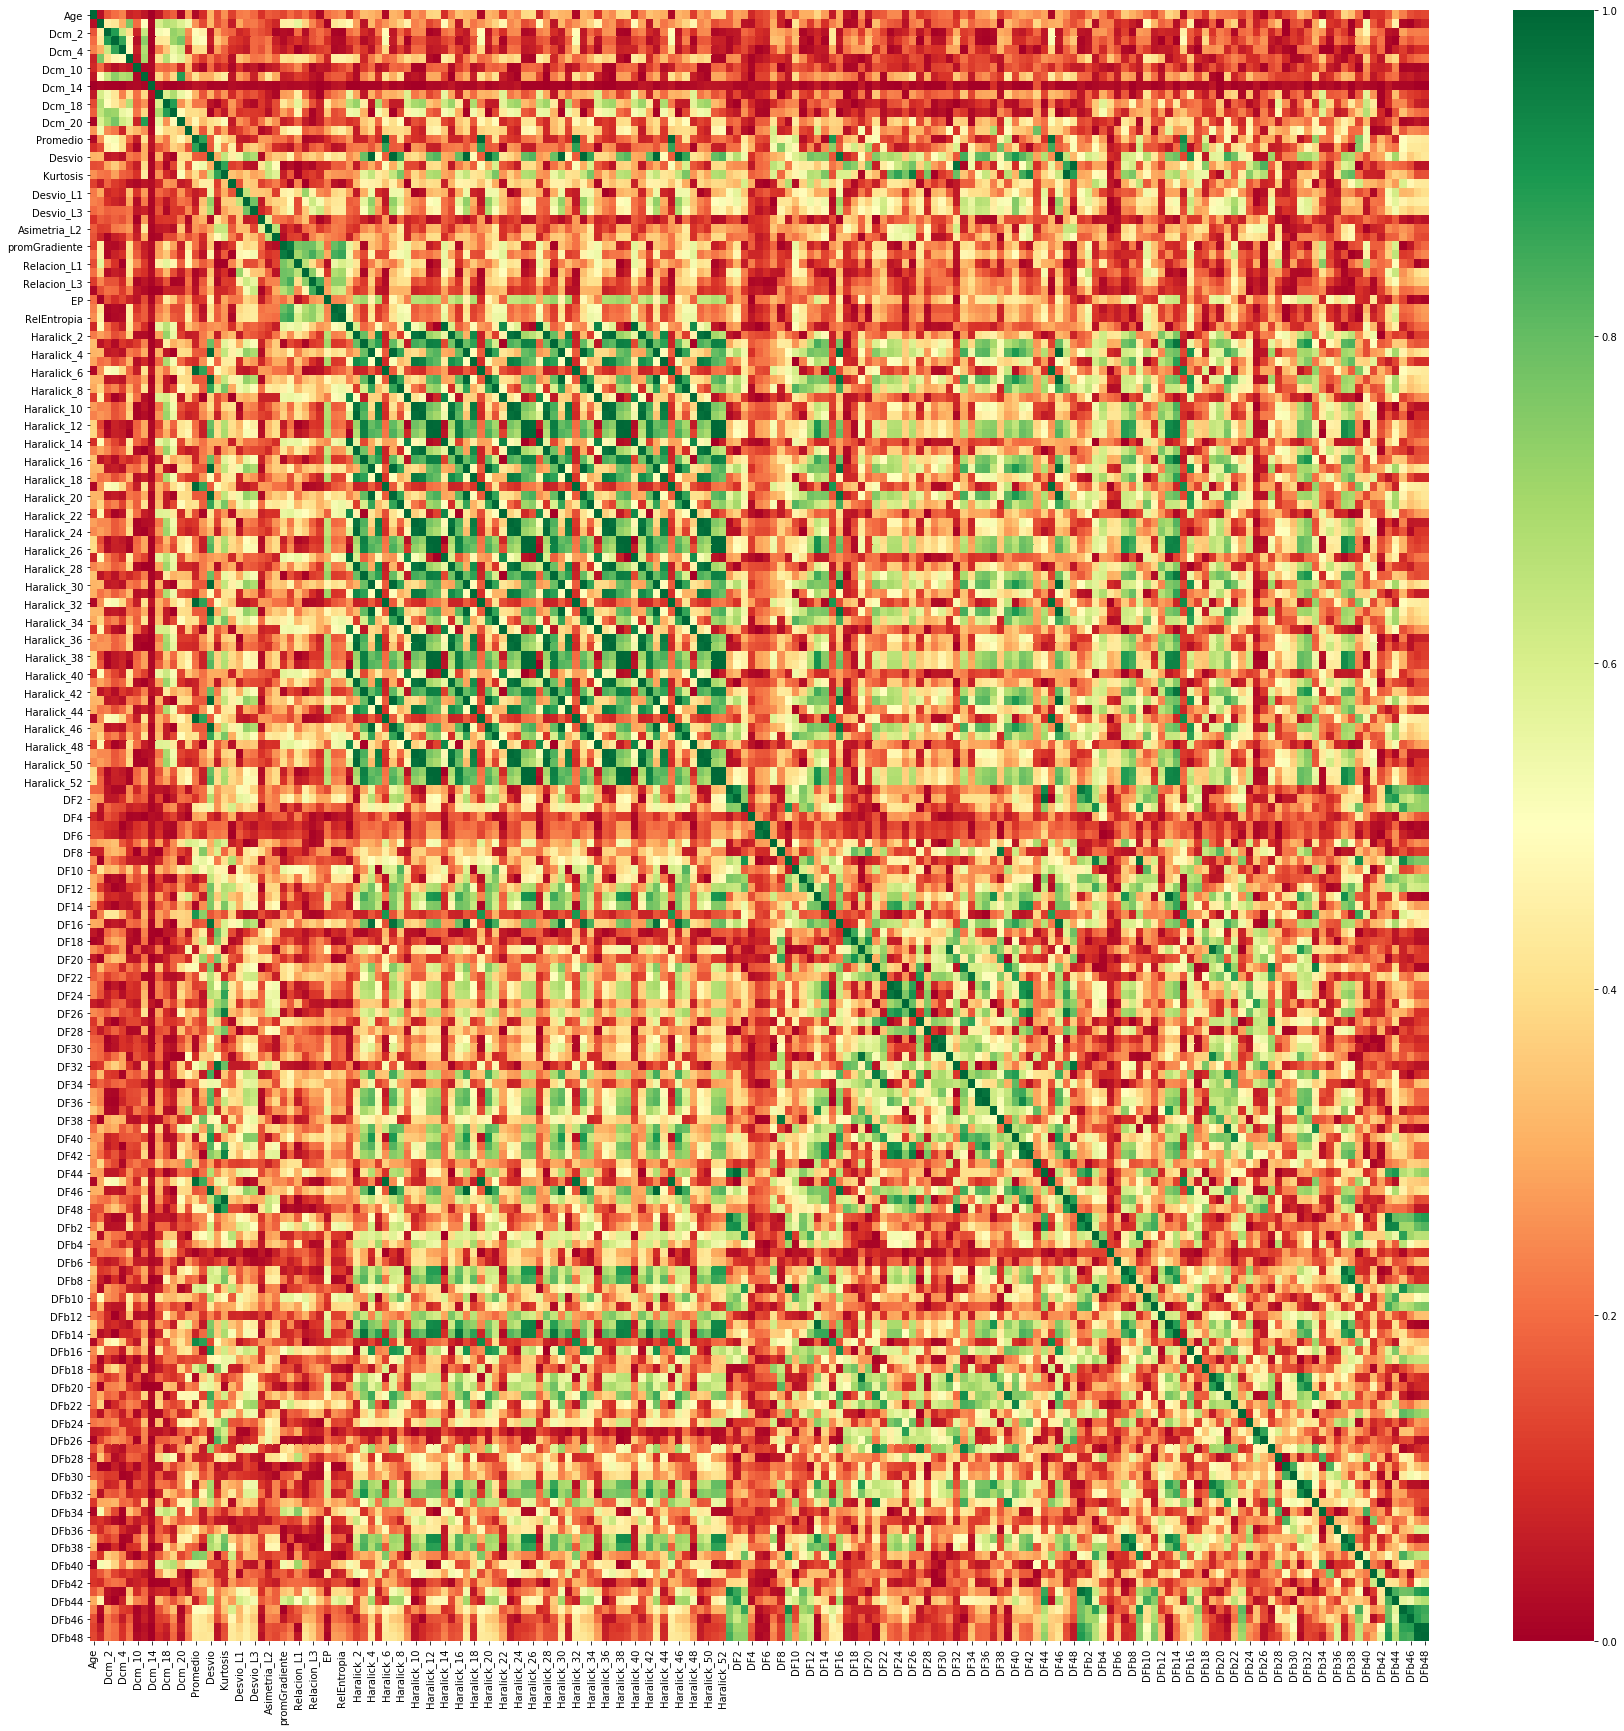

In [41]:
corr = data_zscore.corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

Tomamos los pares de variables altamente correlacionadas (>0.95) y se descartamos una de ellas para de esta forma disminuir la dimensión del problema.

In [42]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [43]:
_X = []
_Y = []

for column in upper.columns:
    print(column)
    for i in range(upper[column].shape[0]):
        if(upper[column][i] > 0.95):
            print('    ',upper[column].index[i],upper[column][i])
            _X.append(column)
            _Y.append(upper[column].index[i])

Age
Dcm_1
Dcm_2
Dcm_3
Dcm_4
Dcm_9
Dcm_10
Dcm_12
Dcm_14
Dcm_17
Dcm_18
Dcm_19
Dcm_20
Area
Promedio
Media
Desvio
Asimetria
Kurtosis
Moda
Desvio_L1
Desvio_L2
Desvio_L3
Asimetria_L1
Asimetria_L2
Asimetria_L3
promGradiente
Relacion
     promGradiente 0.9607235393653814
Relacion_L1
Relacion_L2
Relacion_L3
Relacion_L4
EP
EPBinaria
RelEntropia
     EPBinaria 0.9744101789098011
Haralick_1
Haralick_2
Haralick_3
Haralick_4
     Desvio 0.9999926707207433
Haralick_5
Haralick_6
     Promedio 0.999994533178518
Haralick_7
     Desvio 0.9998293271072548
     Haralick_4 0.9998457370355267
Haralick_8
Haralick_9
Haralick_10
     Haralick_2 0.975715432344729
     Haralick_5 0.9630389488415794
Haralick_11
     Haralick_2 0.9976085974289369
     Haralick_10 0.9851743259608977
Haralick_12
     Haralick_3 0.952730312148373
Haralick_13
     Haralick_12 0.9954851025098689
Haralick_14
     Haralick_1 0.9956101788727225
Haralick_15
     Haralick_2 0.9935106932079515
     Haralick_10 0.9686034866858437
     Haralick

DF26
     Kurtosis 0.9541611888285224
DF27
DF28
DF29
DF30
     DF29 0.9669201066273846
DF31
     DF19 0.9762221878975585
DF32
     Asimetria 0.9770862520739223
DF33
     DF21 0.9606824782670011
DF34
     DF22 0.9666088076416576
DF35
DF36
     DF35 0.9739630704375885
DF37
DF38
     DF8 0.9681853430153256
DF39
DF40
DF41
DF42
     DF24 0.9551570277149485
     DF26 0.9528465707244252
     DF41 0.9596709152308106
DF43
DF44
     DF2 0.9989497777559405
DF45
     Promedio 0.9881851265438206
     Haralick_6 0.9882959105534065
     Haralick_19 0.9883105674566534
     Haralick_32 0.9882463866926012
     Haralick_45 0.9883072752534003
DF46
     Desvio 0.9979085279979761
     Haralick_4 0.9979483875345161
     Haralick_7 0.9980358225709778
     Haralick_17 0.9979500737923055
     Haralick_20 0.9980280416205415
     Haralick_30 0.9979272599885938
     Haralick_33 0.9980170016162663
     Haralick_43 0.9979554063399411
     Haralick_46 0.9980258148627817
     DF16 0.978726694104301
DF47
     Kurtosis 

In [44]:
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

Campos a descartar del análisis futuro por presentar alta correlación con otros campos

In [45]:
print(len(to_drop))
print(to_drop)

78
['Relacion', 'RelEntropia', 'Haralick_4', 'Haralick_6', 'Haralick_7', 'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13', 'Haralick_14', 'Haralick_15', 'Haralick_16', 'Haralick_17', 'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21', 'Haralick_22', 'Haralick_23', 'Haralick_24', 'Haralick_25', 'Haralick_26', 'Haralick_27', 'Haralick_28', 'Haralick_29', 'Haralick_30', 'Haralick_31', 'Haralick_32', 'Haralick_33', 'Haralick_34', 'Haralick_35', 'Haralick_36', 'Haralick_37', 'Haralick_38', 'Haralick_39', 'Haralick_40', 'Haralick_41', 'Haralick_42', 'Haralick_43', 'Haralick_44', 'Haralick_45', 'Haralick_46', 'Haralick_47', 'Haralick_48', 'Haralick_49', 'Haralick_50', 'Haralick_51', 'Haralick_52', 'DF6', 'DF16', 'DF24', 'DF26', 'DF30', 'DF31', 'DF32', 'DF33', 'DF34', 'DF36', 'DF38', 'DF42', 'DF44', 'DF45', 'DF46', 'DF47', 'DF48', 'DFb1', 'DFb3', 'DFb9', 'DFb13', 'DFb14', 'DFb19', 'DFb21', 'DFb27', 'DFb31', 'DFb37', 'DFb38', 'DFb43', 'DFb48']


In [46]:
data_corr = data_zscore.copy()
data_corr = data_corr.drop(to_drop,axis=1)

In [47]:
print("Tamaño original: \n","   Número de imágenes: %i\n" % data_zscore.shape[0], "   Número de campos %i" % data_zscore.shape[1])
print("Tamaño final: \n","   Número de imágenes: %i\n" % data_corr.shape[0], "   Número de campos %i" % data_corr.shape[1])

Tamaño original: 
    Número de imágenes: 6605
    Número de campos 197
Tamaño final: 
    Número de imágenes: 6605
    Número de campos 119


De esta forma es posible reducir el número de campos de interés de 197 a 119

## Análisis de Componentes Principales

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
principalcomponents = pca.fit_transform(data_zscore[NumFeat])

In [49]:
pca.components_

array([[ 0.04943125,  0.03925881, -0.00198738, ...,  0.01608446,
        -0.03788884, -0.04085671],
       [-0.01861189,  0.08380395,  0.07338456, ...,  0.00711663,
        -0.00275207, -0.02424979],
       [ 0.01133706, -0.02736823, -0.08915162, ...,  0.1766277 ,
        -0.13363349, -0.16623695],
       ...,
       [-0.16179017,  0.04039632, -0.10843106, ...,  0.09311526,
         0.12572381,  0.01147487],
       [-0.22772459, -0.06632208, -0.05846442, ...,  0.13171599,
        -0.05425108, -0.05110733],
       [-0.16683353, -0.16031784,  0.10892688, ..., -0.04306141,
         0.09719222,  0.1341204 ]])

In [50]:
pca.explained_variance_ratio_

array([0.29723154, 0.15239386, 0.12085961, 0.10342357, 0.04210127,
       0.03298577, 0.02657688, 0.02381935, 0.0218834 , 0.0155462 ,
       0.01342174, 0.01280975, 0.01064802, 0.00881694, 0.00784571,
       0.00682711, 0.00663142, 0.0061008 , 0.00572427, 0.00530771,
       0.00500715, 0.00461136, 0.00432124, 0.00394397, 0.00367842,
       0.00364252, 0.00346727, 0.00324595, 0.00274638, 0.00255364])

In [51]:
print("Utilizando ", pca.n_components, " se consigue explicar el ", "%.2f" % pca.explained_variance_ratio_.sum(), " % de la variaza de los datos")

Utilizando  30  se consigue explicar el  0.96  % de la variaza de los datos


Graficamos las primeras 10 componentes

In [52]:
data_pca = pd.DataFrame(data = principalcomponents[:,0:10],columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',],index=data_zscore.index)

In [53]:
data_pca = pd.concat([data_pca,data_zscore['ACR']],axis=1)
data_pca.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,ACR
Imagen,,,,,,,,,,,
Imagen_0.npy,-4.016936,-4.683463,-2.513679,-3.156039,1.642492,-0.696571,-1.464255,-1.431777,1.755330,1.111589,c
Imagen_1.npy,-1.046142,-5.787731,-4.643722,-1.756916,3.775681,-2.866194,-1.091934,-0.560702,0.479604,1.083218,c
Imagen_2.npy,-2.073574,-1.410203,-5.092998,-2.465210,3.102432,-2.495750,-2.157888,0.049782,-0.389984,2.019693,c
Imagen_3.npy,-5.682281,-8.321154,-1.544756,-1.754427,1.280347,-0.969318,0.530737,-0.847590,1.405341,-1.057740,c
Imagen_4.npy,11.869762,0.966168,-3.050916,-5.192143,-0.487344,1.421896,-1.975997,2.362242,-1.277321,-0.084733,c


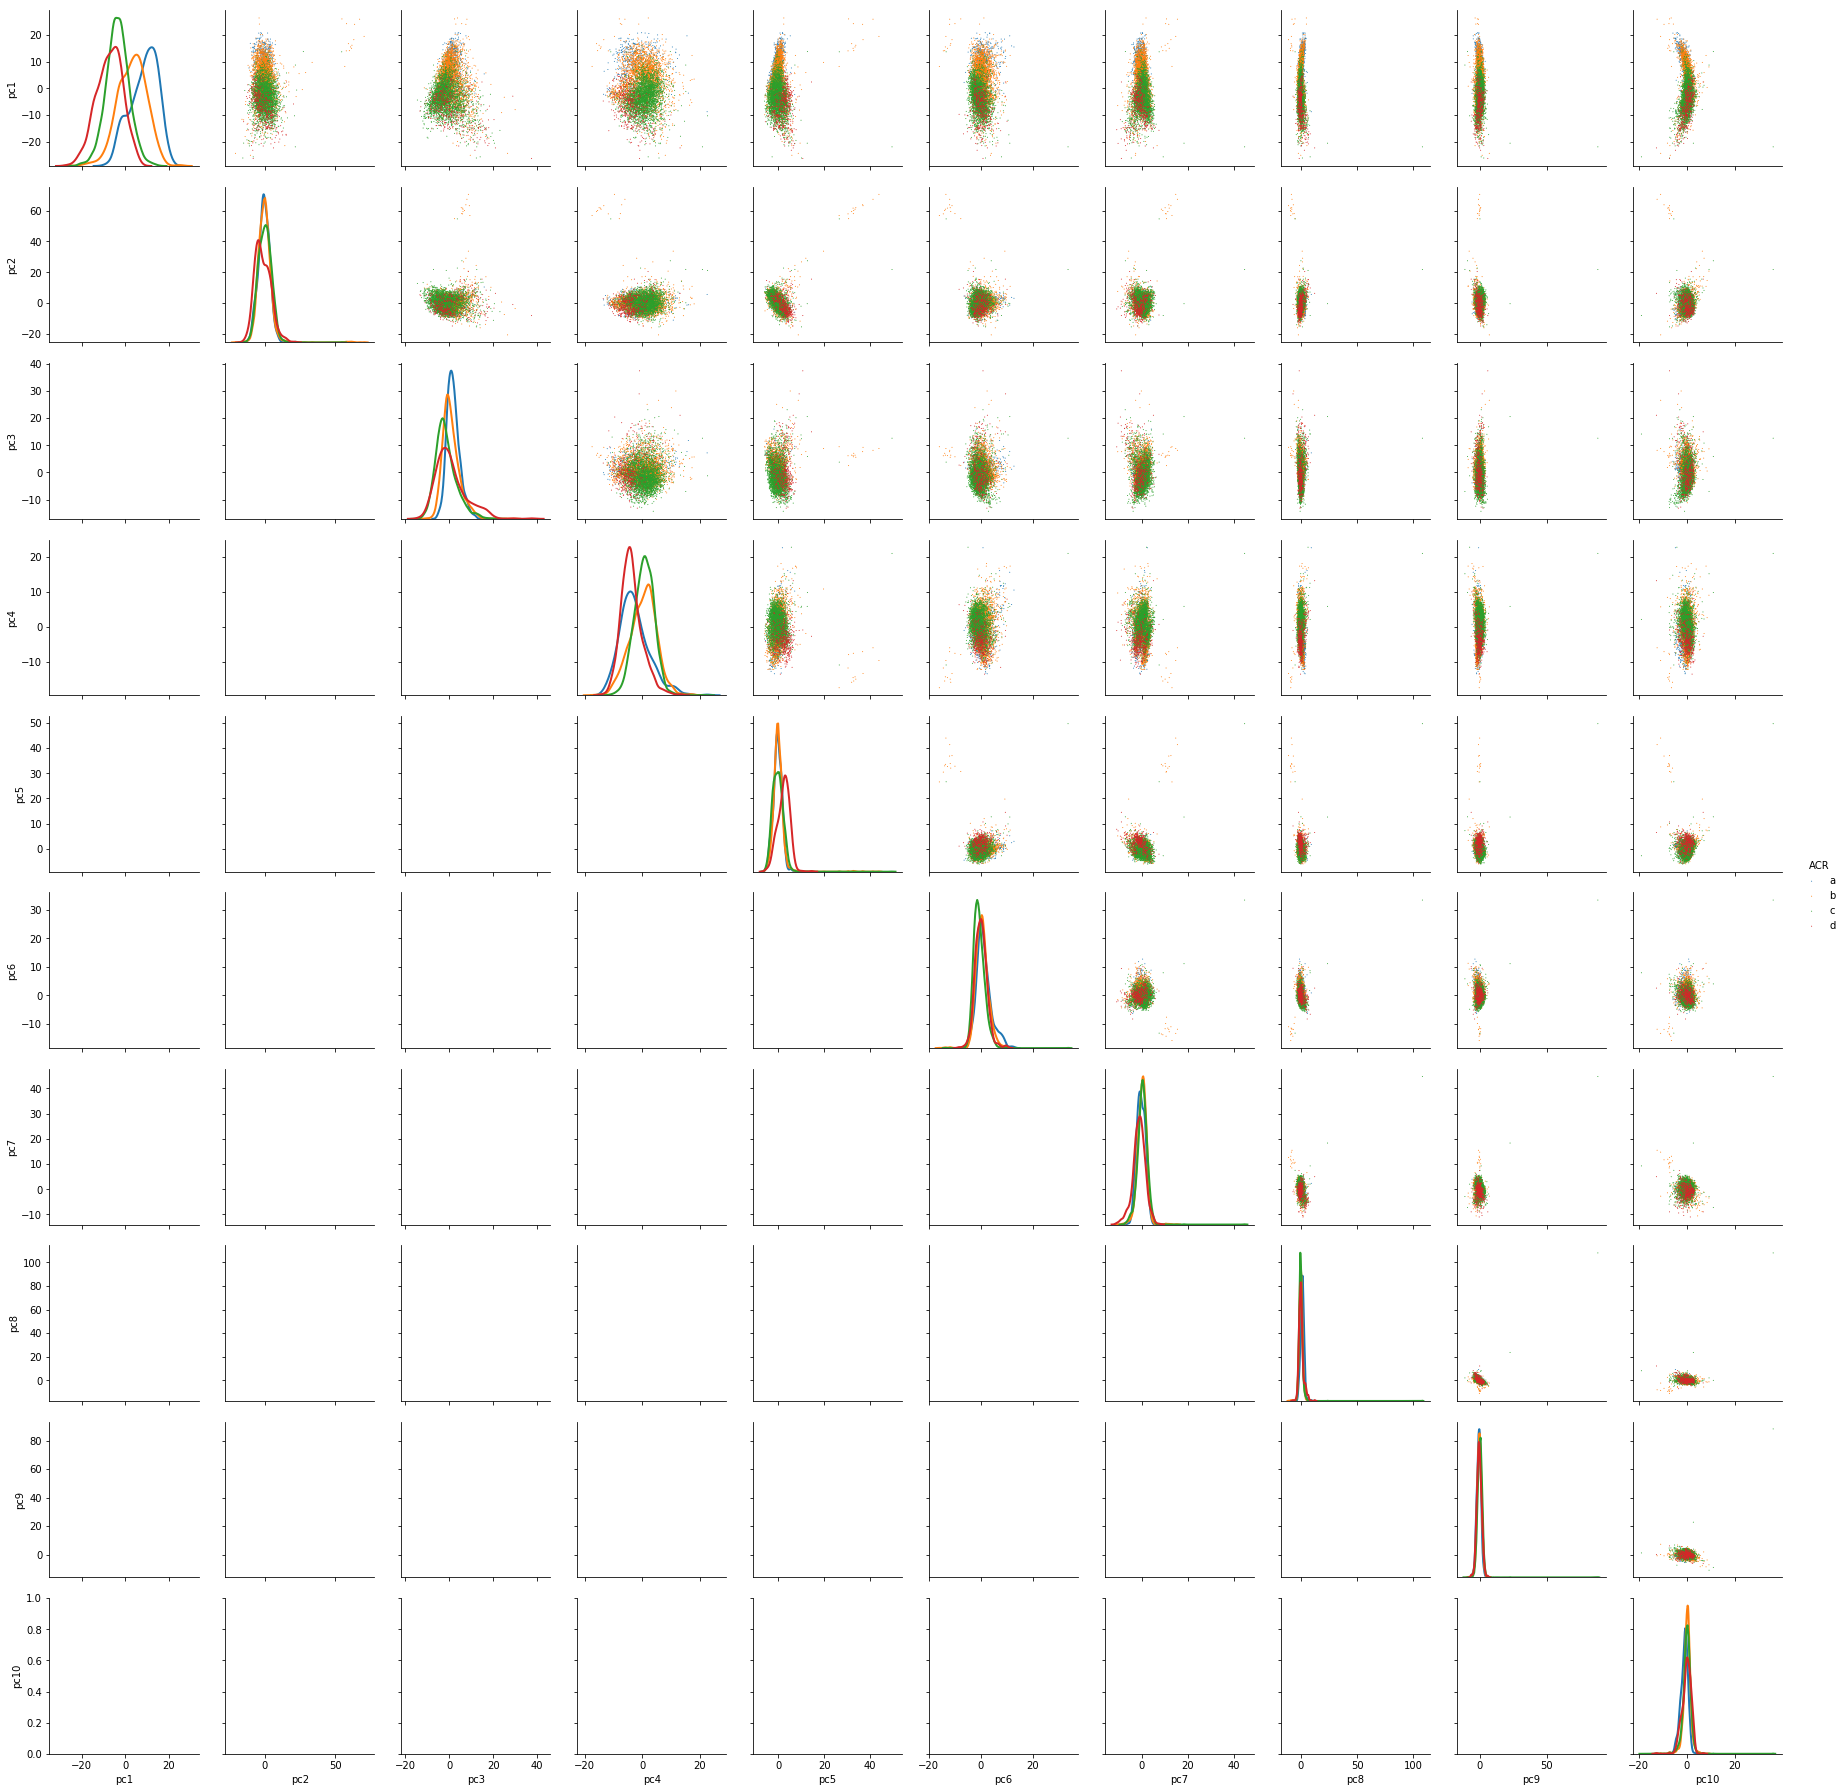

In [54]:
g = sns.PairGrid(data_pca,hue='ACR',hue_order=["a","b","c","d"],despine=True,diag_sharey=False)
g.map_upper(plt.scatter,s=1,edgecolors='None')
#g.map_lower(sns.kdeplot,n_levels=3)
g.map_diag(sns.kdeplot, lw=2, legend=False)
g.add_legend()
sns.despine()

A _prima facie_ no se observa que la proyección en componentes principales nos brinde una mayor resolución, en el sentido de que individualiza mejor los grupos con diferentes "ACR", pero es algo que debemos seguir explorando. Más aún, las 5 primeras componentes parecieran contener la información necesaria para distiguir los grupos ya que luego las distribuciones se vuelven similares.

# ////////

In [ ]:
import rpy2.rinterface

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
# install.packages("mclust")
# install.packages("cluster")

In [ ]:
%%R -i finalDf

library(mclust)

set.seed(20)
DataCluster <- kmeans(finalDf[, 1:ncol(finalDf)-1], 4, nstart = 20)

table(DataCluster$cluster,finalDf[,ncol(finalDf)])

In [ ]:
%%R -i finalDf

library(cluster)
library(mclust)

silhouette_score <- function(k){
  km <- kmeans(finalDf[,1:ncol(finalDf)-1], centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(finalDf[,1:ncol(finalDf)-1]))
  mean(ss[, 3])
}

k <- 2:10
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Número de grupos', ylab='Promedio Silhouette', frame=FALSE)

# ////////////////

# All together

## Remoción de Outliers

### IQR quantile

In [57]:
data_iqr = data_zscore.copy()

In [58]:
Q1 = data_iqr[NumFeat].quantile(0.25)
Q3 = data_iqr[NumFeat].quantile(0.75)
IQR = Q3 - Q1

In [59]:
data_iqr = data_iqr[~((data_iqr[NumFeat] < (Q1 - 1.5 * IQR)) |(data_iqr[NumFeat] > (Q3 + 1.5 * IQR))).any(axis=1)]
data_iqr.shape,data_zscore.shape

((2209, 197), (6605, 197))

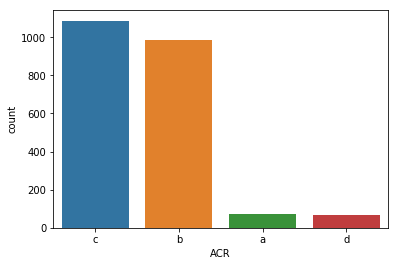

In [63]:
sns.countplot(data_iqr["ACR"])

### Z-score

In [60]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_zscore[NumFeat]))

In [61]:
data_zs = data_zscore.copy()
data_zs = data_zs[(z < 3).all(axis=1)]
data_zs.shape,data_zscore.shape

((4656, 197), (6605, 197))

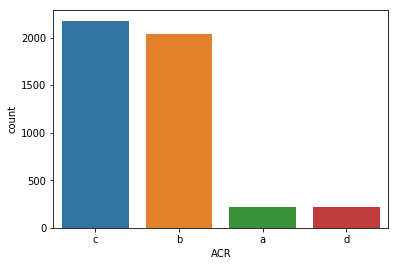

In [62]:
sns.countplot(data_zs["ACR"])

## Reducción de dimensiones

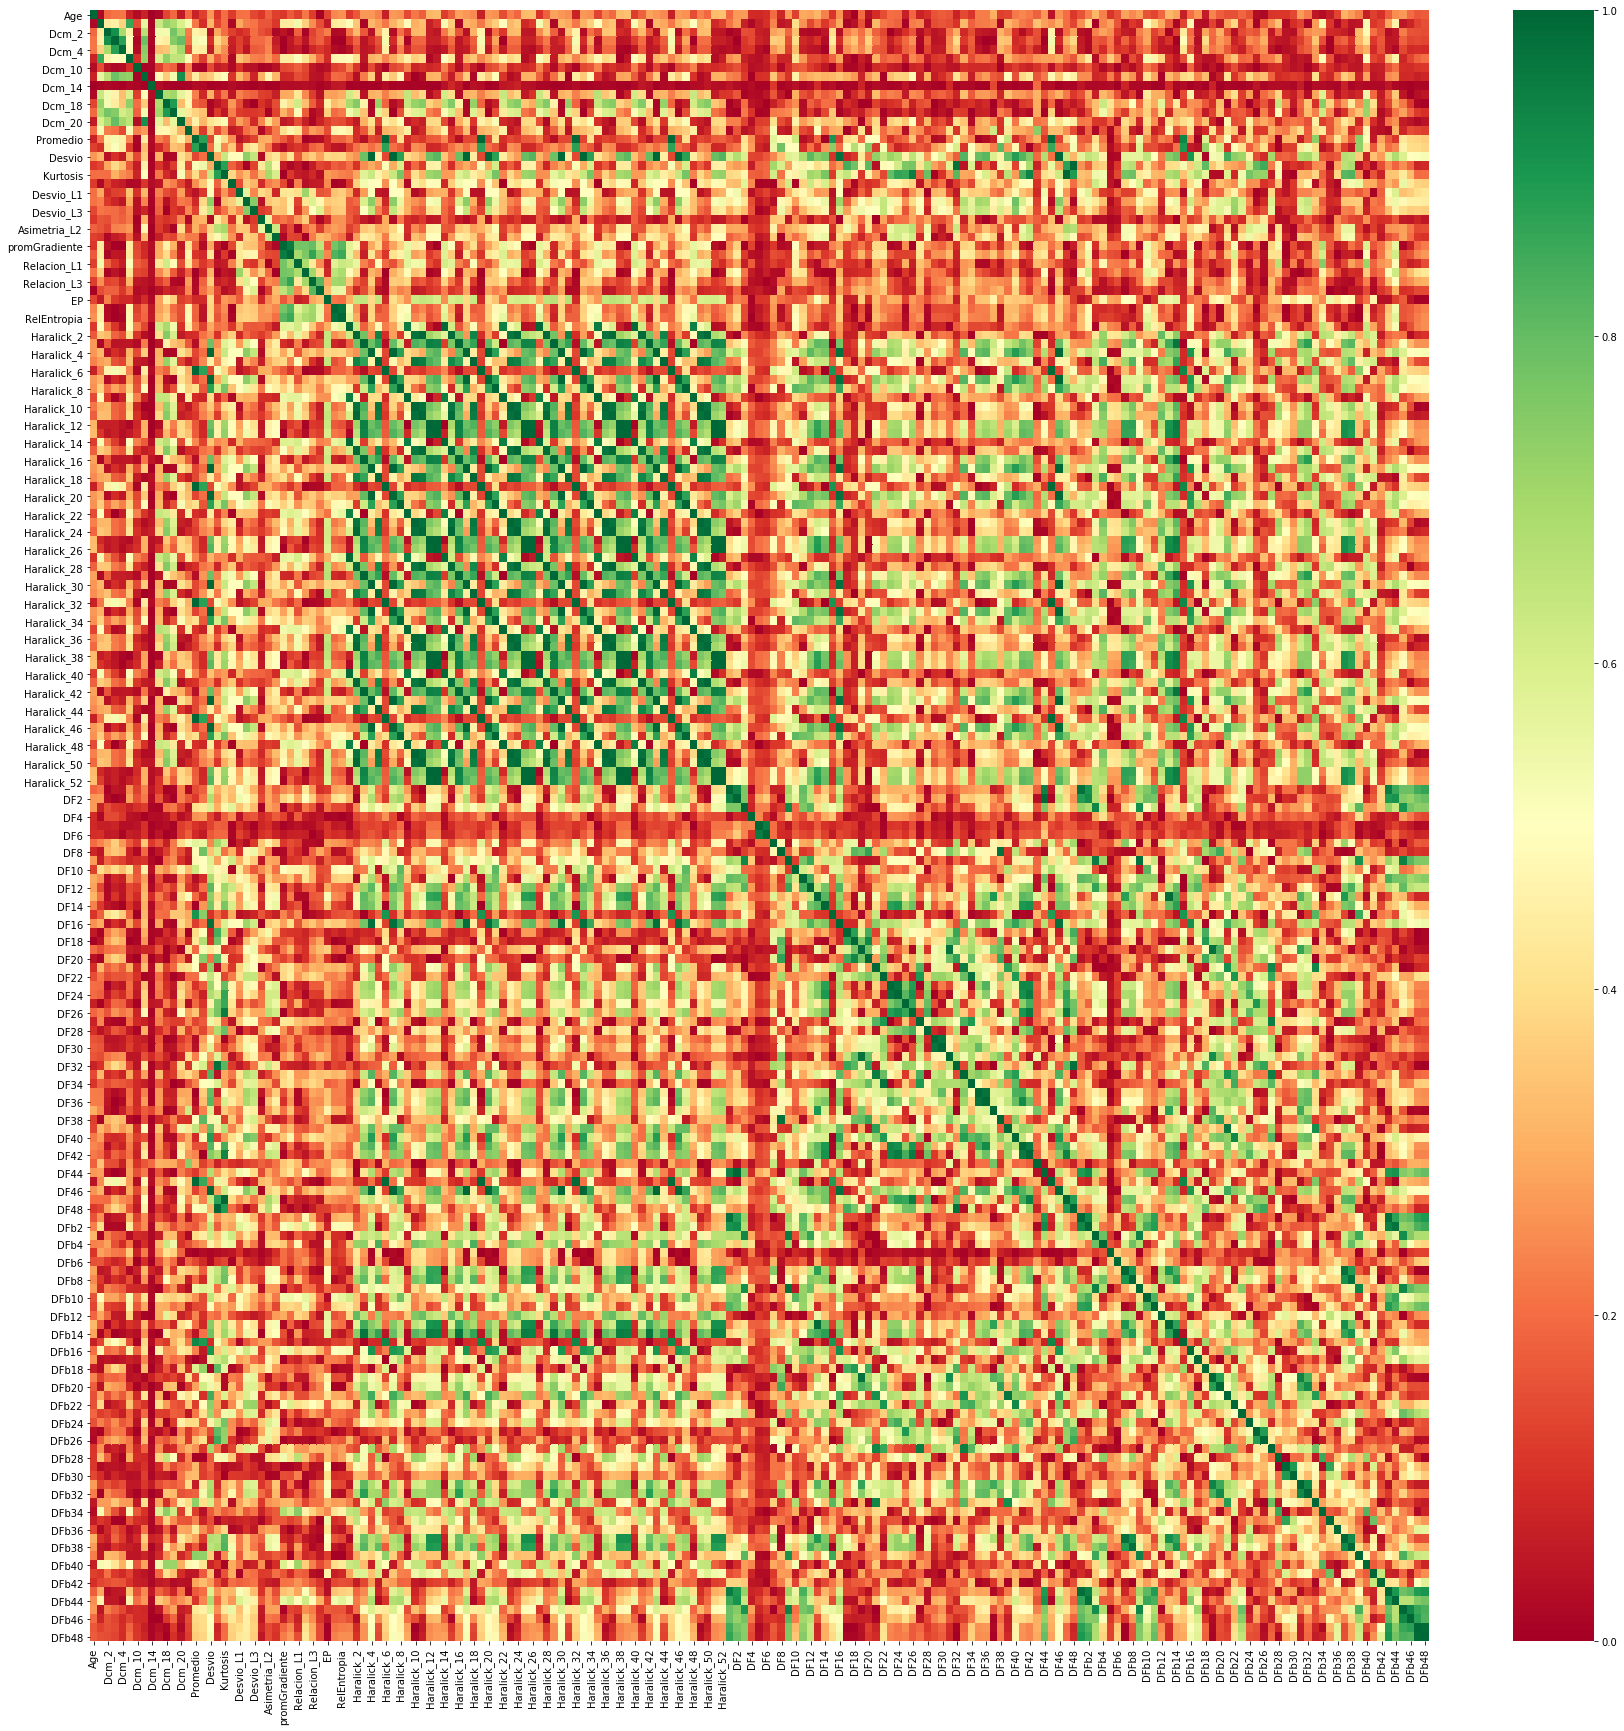

In [64]:
corr = data_zs[NumFeat].corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [65]:
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [66]:
data_redu = data_zs.copy()
data_redu.drop(to_drop,axis=1,inplace=True)

In [67]:
data_redu.shape,data_zs.shape

((4656, 119), (4656, 197))

In [68]:
CatFeat = [x for x in data.columns if data[x].dtype != 'float64']
NumFeat = [x for x in data.columns if data[x].dtype == 'float64']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     183
   variables discretas  14


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
principalcomponents = pca.fit_transform(data_zs[NumFeat])

In [70]:
pca.explained_variance_ratio_

array([0.33362001, 0.14896363, 0.14281273, 0.10288054, 0.03762401,
       0.03291648, 0.0239563 , 0.02286572, 0.0142177 , 0.01311298,
       0.010672  , 0.01003459, 0.00848645, 0.00756919, 0.00703029,
       0.00652754, 0.00608803, 0.00581886, 0.00486169, 0.00457081,
       0.0042002 , 0.00399735, 0.00330043, 0.00313893, 0.00278373,
       0.00254046, 0.00246301, 0.00219694, 0.00199775, 0.00179168])

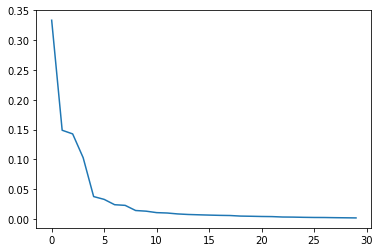

In [71]:
plt.plot(pca.explained_variance_ratio_)

In [72]:
print("Utilizando ", pca.n_components, " se consigue explicar el ", "%.2f" % pca.explained_variance_ratio_.sum(), " % de la variaza de los datos")

Utilizando  30  se consigue explicar el  0.97  % de la variaza de los datos


In [75]:
data_pca = pd.DataFrame(data = principalcomponents[:,0:10],columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10',],index=data_zs.index)
data_pca = pd.concat([data_pca,data_zs['ACR']],axis=1)

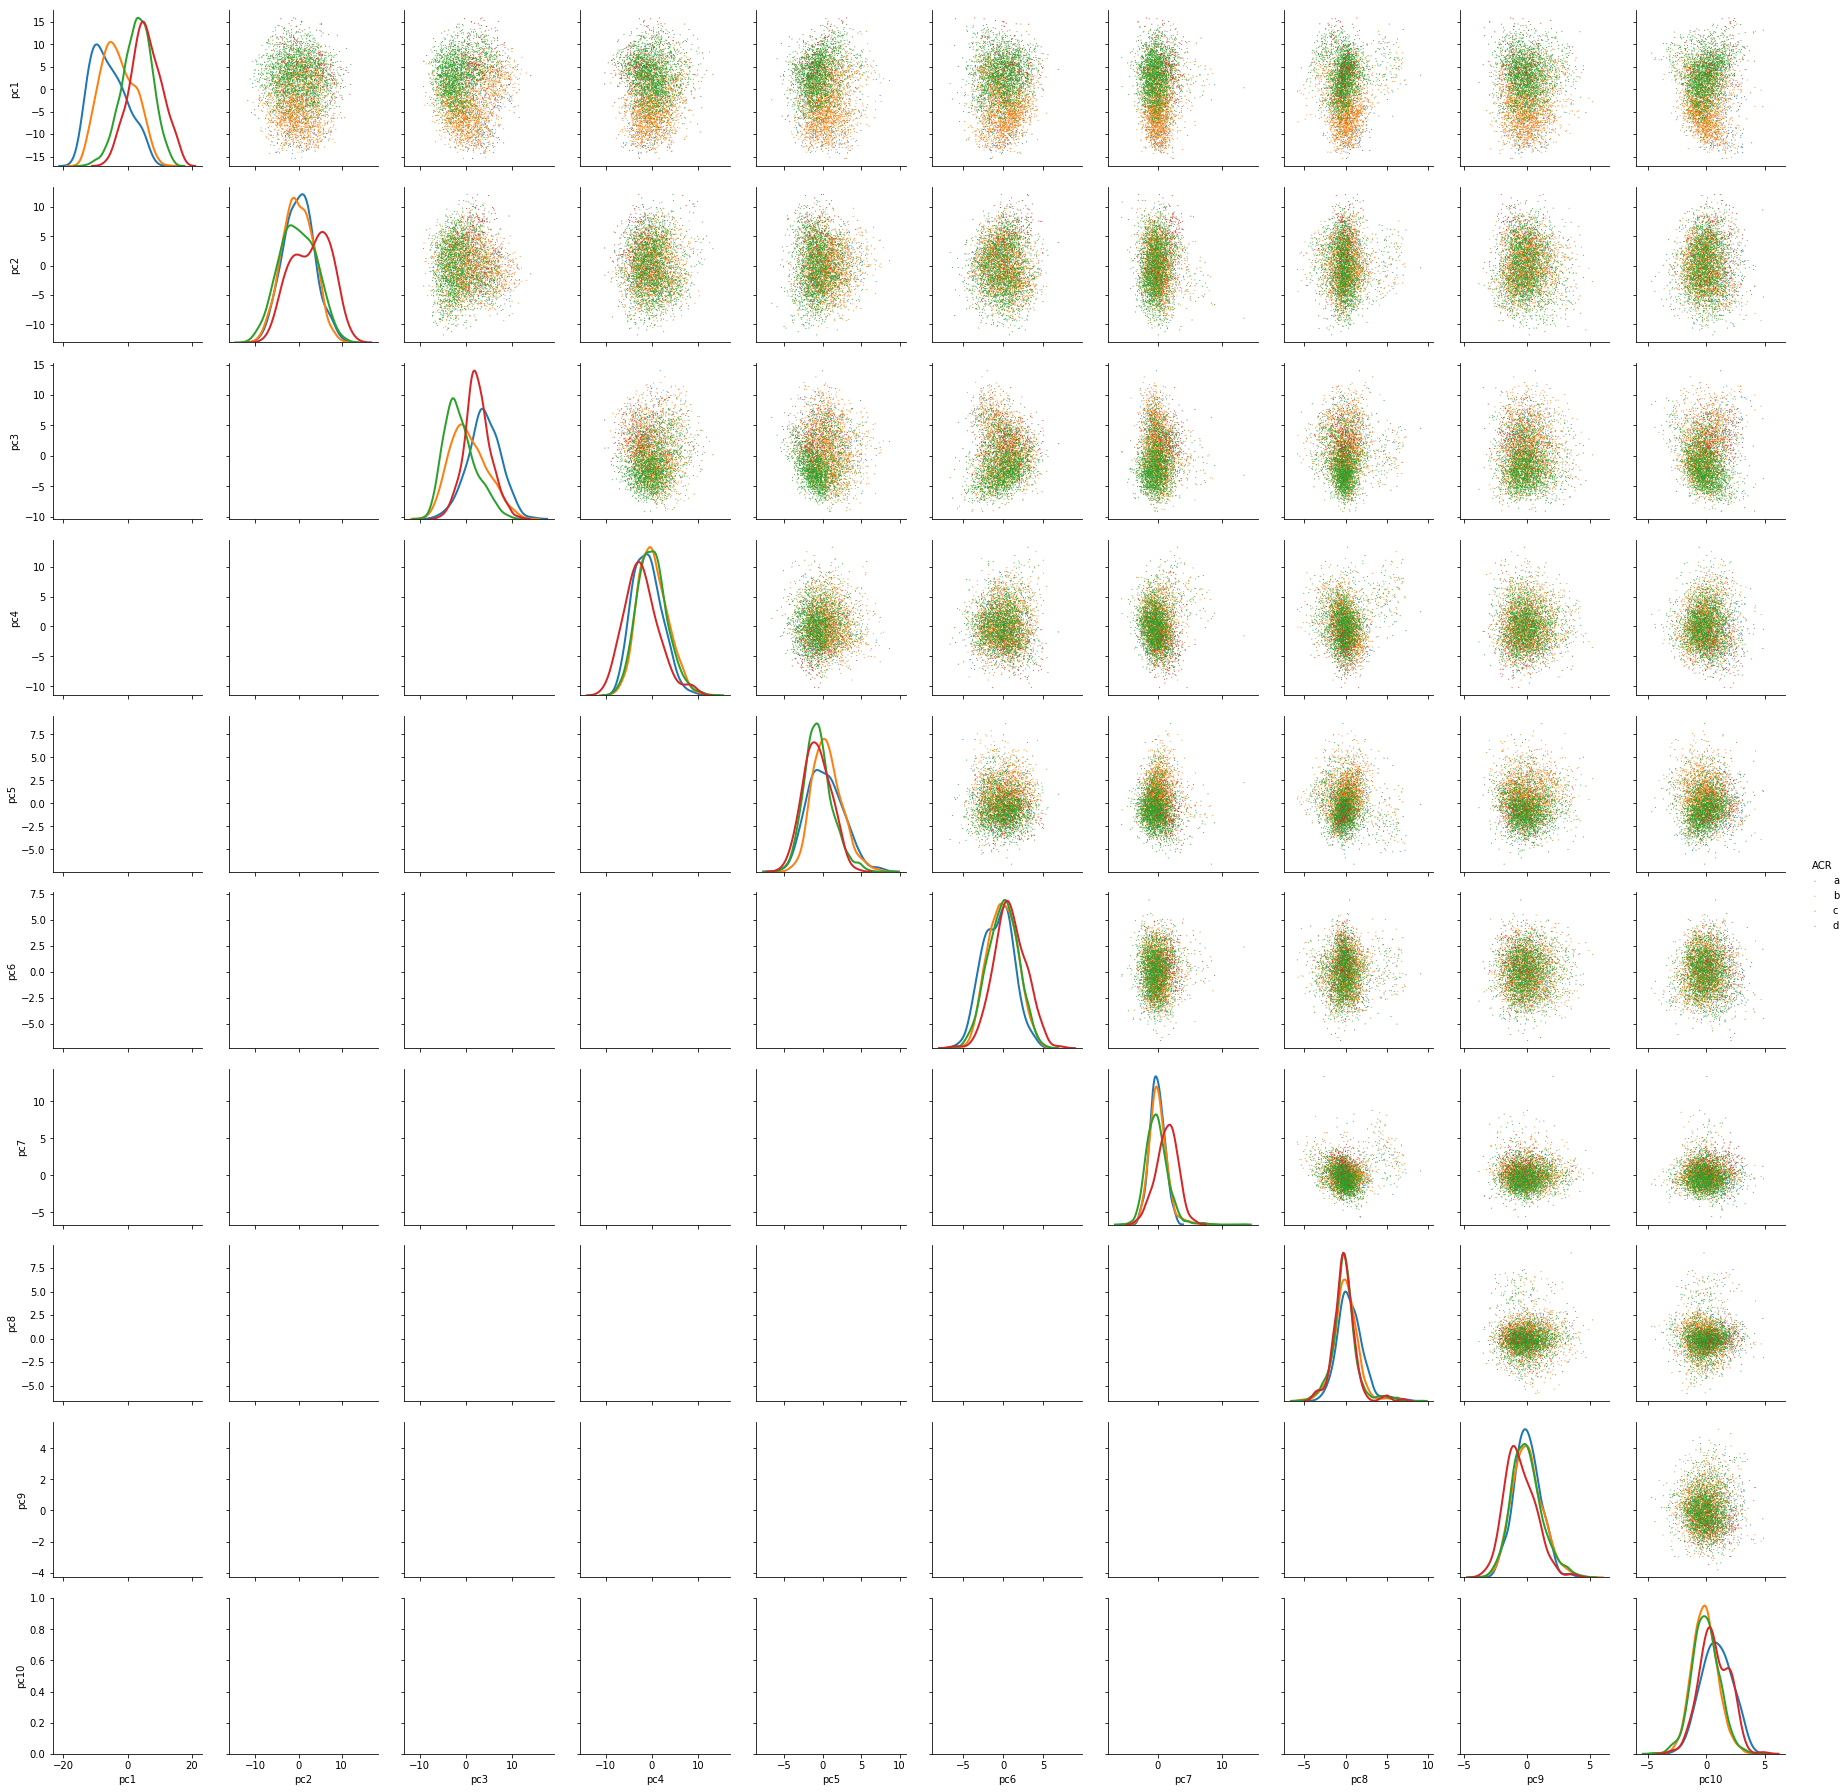

In [76]:
g = sns.PairGrid(data_pca,hue='ACR',hue_order=["a","b","c","d"],despine=True,diag_sharey=False)
g.map_upper(plt.scatter,s=1,edgecolors='None')
#g.map_lower(sns.kdeplot,n_levels=3)
g.map_diag(sns.kdeplot, lw=2, legend=False)
g.add_legend()
sns.despine()